<b><h1> WP1 </h1></b>

## Imports

In [260]:
import numpy as np
import matplotlib.pyplot as plt

In [261]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.metrics import *
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [262]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hugop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Regex Replacer

In [263]:
import re

replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
]

replacement_patterns = [(r'don\'t', 'do not')]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]

    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

replacer=RegexpReplacer()

## Gathering data

In [274]:
str1 = replacer.replace(open('docs_presse/doc1.txt', encoding='utf-8').read().lower())
str2 = replacer.replace(open('docs_presse/doc2.txt', encoding='utf-8').read().lower())
str3 = replacer.replace(open('docs_presse/doc3.txt', encoding='utf-8').read().lower())

### Tokenizing the documents

In [275]:
tokenizer = RegexpTokenizer(r'\w+')

In [276]:
str1 = tokenizer.tokenize(str1)
str2 = tokenizer.tokenize(str2)
str3 = tokenizer.tokenize(str3)

### Removing the stopwords

In [277]:
stops=set(stopwords.words('english'))

In [278]:
liste_mots1 = [_str for _str in str1 if _str not in stops]
liste_mots2 = [_str for _str in str2 if _str not in stops]
liste_mots3 = [_str for _str in str3 if _str not in stops]

### Stemming

In [279]:
stemmer_output=PorterStemmer()

In [280]:
for i in range(len(liste_mots1)):
    liste_mots1[i] = stemmer_output.stem(liste_mots1[i])
for i in range(len(liste_mots2)):
    liste_mots2[i] = stemmer_output.stem(liste_mots2[i])
for i in range(len(liste_mots3)):
    liste_mots3[i] = stemmer_output.stem(liste_mots3[i])

### Lemmatization

In [281]:
lemmatizer = WordNetLemmatizer()

In [282]:
for i in range(len(liste_mots1)):
    liste_mots1[i] = lemmatizer.lemmatize(liste_mots1[i])
for i in range(len(liste_mots2)):
    liste_mots2[i] = lemmatizer.lemmatize(liste_mots2[i])
for i in range(len(liste_mots3)):
    liste_mots3[i] = lemmatizer.lemmatize(liste_mots3[i])

In [241]:
l = [liste_mots1,liste_mots2,liste_mots3]
l_noms = ['liste_mots1','liste_mots2','liste_mots3']

## Distance between two texts using jaccard distance

In [242]:
jaccard_distance(set(liste_mots1),set(liste_mots3))

0.9523052464228935

In [243]:
jaccard_matrix = np.zeros([3, 3])

In [244]:
for i in range(len(l)):
    for j in range(len(l)):
        jaccard_matrix[i][j] = jaccard_distance(set(l[i]),set(l[j]))

### Similarity matrix

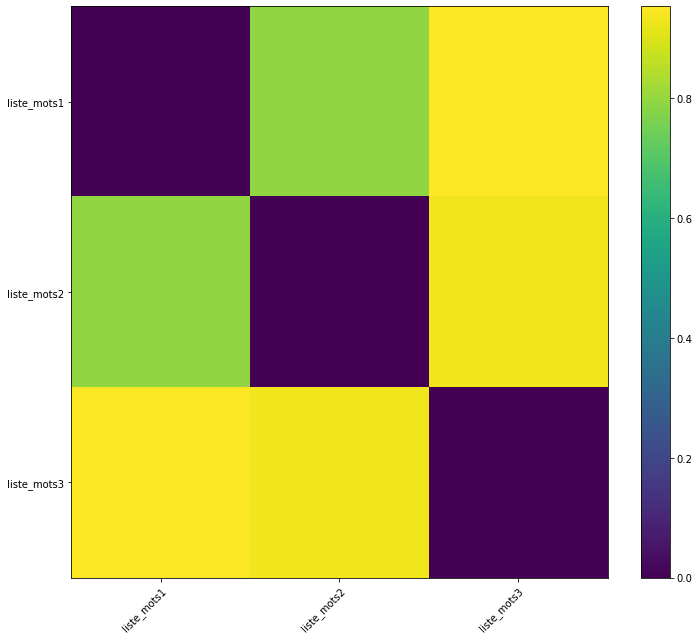

In [245]:
fig, ax = plt.subplots(figsize=(10.5, 9))
im = ax.imshow(jaccard_matrix, interpolation='nearest', aspect='auto')
fig.colorbar(im)
ax.set_xticks(np.arange(0,3))
ax.set_yticks(np.arange(0,3))
ax.set_xticklabels(l_noms)
ax.set_yticklabels(l_noms)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig.tight_layout()
plt.show()

## Zipf's Law

In [284]:
from operator import itemgetter
import matplotlib.pyplot as plt

In [285]:
def zipf_law(article):
    result = []
    frequency = {}
    for sentence in article:
        for word in sentence:
            count = frequency.get(word, 0)
            frequency[word] = count + 1

    lists = sorted(frequency.items(), key = lambda kv: kv[1], reverse = True) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(y, color='r')
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    plt.title("Zipf's law of the article")
    plt.show()

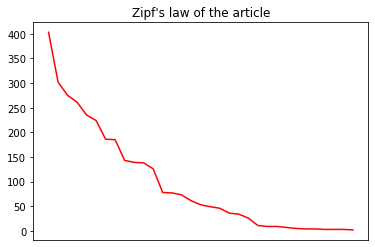

In [254]:
zipf_law(str1)

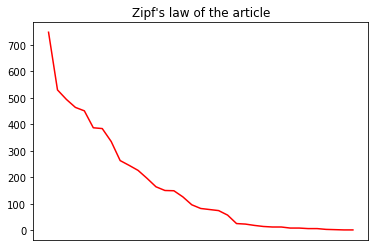

In [255]:
zipf_law(str2)

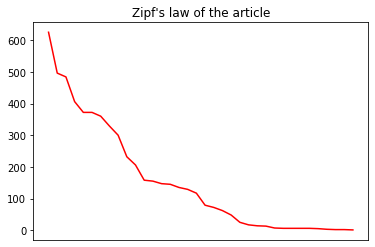

In [256]:
zipf_law(str3)